In [64]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

train = pd.read_csv('./data.csv')
test = pd.read_csv('./test.csv')
test.head()
len(test)

13485

In [2]:
train.shape

(40455, 10)

In [3]:
train.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [4]:
train.color.value_counts()

G    8492
E    7343
F    7183
H    6230
D    5046
I    4046
J    2115
Name: color, dtype: int64

In [5]:
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [66]:
Y = train['price']
X = train [['carat', 'cut', 'color', 'clarity','depth', 'table','x', 'y', 'z']]

KeyError: "['color', 'cut', 'clarity'] not in index"

In [7]:
import seaborn as sns
train.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.024370,0.180861,0.975010,0.944669,0.948835,0.921898
depth,0.024370,1.000000,-0.296418,-0.028645,-0.032708,0.090617,-0.014383
table,0.180861,-0.296418,1.000000,0.195254,0.181997,0.149342,0.125521
x,0.975010,-0.028645,0.195254,1.000000,0.967161,0.966188,0.884500
y,0.944669,-0.032708,0.181997,0.967161,1.000000,0.941816,0.859138
z,0.948835,0.090617,0.149342,0.966188,0.941816,1.000000,0.857643
price,0.921898,-0.014383,0.125521,0.884500,0.859138,0.857643,1.000000


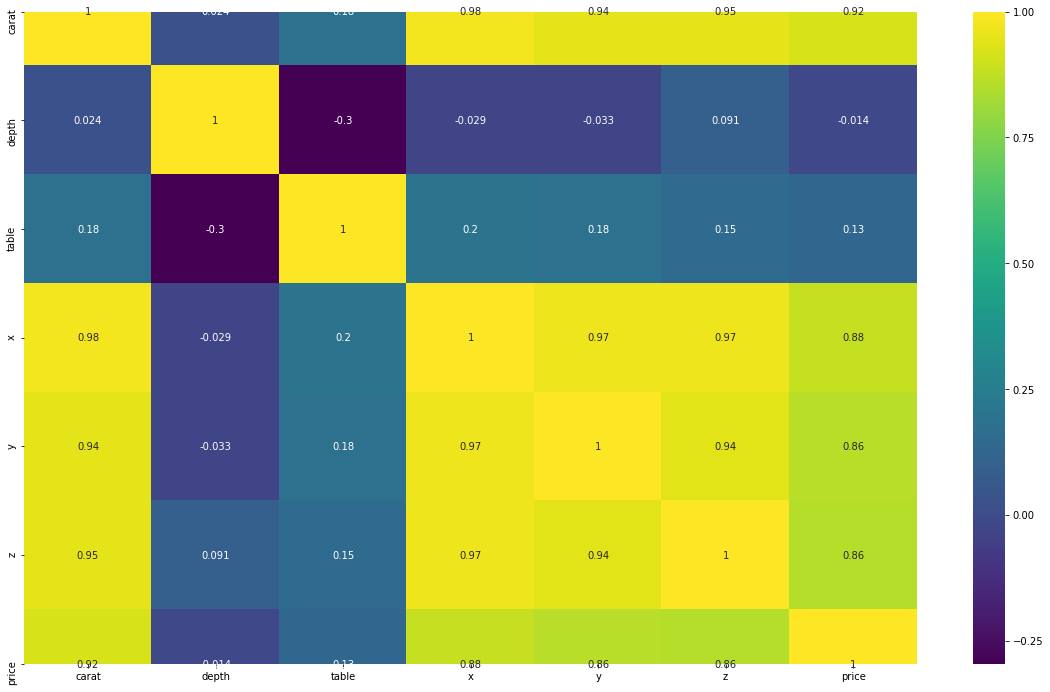

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), cmap='viridis', annot=True)

In [9]:
train.drop(['z', 'y'], axis = 1, inplace = True)

In [10]:
train

,carat,cut,color,clarity,depth,table,x,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,698
...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,5315
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,2762
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,6855
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,2297


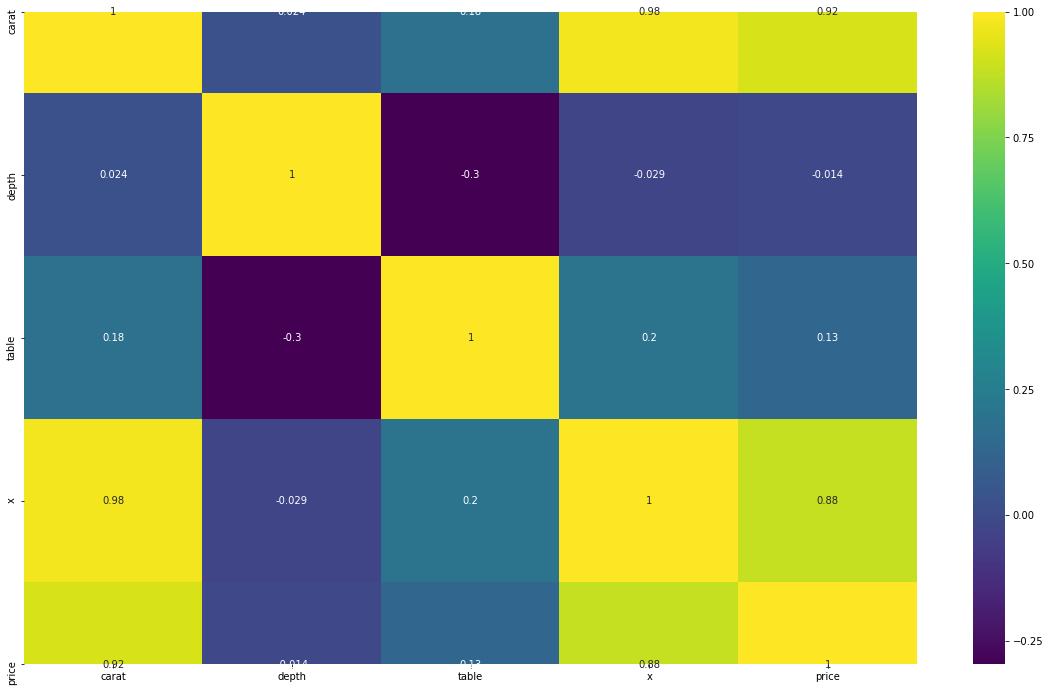

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), cmap='viridis', annot=True)

In [65]:
train = pd.get_dummies(train, columns = ['color', 'cut', 'clarity'])

In [21]:
train
#hasta aquí, limpio el TRAIN

,carat,depth,table,x,y,z,price,color_D,color_E,color_F,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,61.9,57.0,8.44,8.36,5.20,12831,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.43,63.2,57.0,8.56,8.50,5.39,16170,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0.80,61.0,57.0,6.03,6.01,3.67,2797,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0.40,63.3,60.0,4.68,4.64,2.95,630,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.31,61.6,55.0,4.39,4.37,2.70,698,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.11,62.8,61.0,6.63,6.56,4.14,5315,0,0,0,...,1,0,0,0,1,0,0,0,0,0
40451,0.73,62.6,56.0,5.77,5.74,3.60,2762,0,0,1,...,0,0,0,0,0,0,0,1,0,0
40452,1.26,59.2,60.0,7.09,7.02,4.18,6855,0,0,0,...,0,1,0,0,0,0,1,0,0,0
40453,0.72,61.4,56.0,5.76,5.83,3.56,2297,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
def testoperator(dt):
    Xtest = dt[['carat', 'cut', 'color', 'clarity','depth', 'table','x',"y","z"]]
    Xtest = pd.get_dummies(data = Xtest, columns = ['color', "cut", "clarity"], drop_first=False)
    return Xtest

In [23]:
test_t = testoperator(test)

In [38]:
from sklearn.linear_model import LinearRegression

train_t = train.drop(columns = ["price"])
display(train_t.head())
X = train_t
y = train["price"]
model = LinearRegression()
model.fit(X,y)


,carat,depth,table,x,y,z,color_D,color_E,color_F,color_G,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,61.9,57.0,8.44,8.36,5.20,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2.43,63.2,57.0,8.56,8.50,5.39,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0.80,61.0,57.0,6.03,6.01,3.67,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0.40,63.3,60.0,4.68,4.64,2.95,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0.31,61.6,55.0,4.39,4.37,2.70,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
test_t.head()
pred = model.predict(test_t)

In [57]:
sub = pd.DataFrame(test["id"])
sub["price"] = pred

In [59]:
sub.to_csv("submission1.csv",index=False)

In [63]:
len(test)

13485